# 🎬 Netflix Dataset Analysis — Major Project

### 📘 Introduction
This project analyzes the Netflix dataset (7,789 records, 11 columns) containing details about Movies and TV Shows such as:
- Title, Director, Cast, Country
- Release Date, Rating, Duration
- Type (Movie/TV Show), and Genre information

### 🎯 Objectives
1. Analyze the distribution of Movies vs. TV Shows over the years.  
2. Identify the most common genres and how their popularity changed.  
3. Compare country-wise contributions to Netflix’s catalog.

### 📈 Expected Outcomes
- Insights into Netflix’s content strategy evolution.  
- Identification of top-performing genres and countries.  
- Strategic recommendations for future content focus.


2: Install and Import Required Libraries





In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid", palette="Set2")

3: Load the Dataset

In [4]:
file_path = "/content/drive/MyDrive/Netflix proj/Netflix Dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


4: Explore the Dataset
- `info()` gives an overview of data types and missing values.  
- `isnull().sum()` helps identify incomplete columns.  
- `describe()` shows summary statistics — useful for numeric & text fields.  


In [6]:
# Display basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Display basic statistics
df.describe(include='all').transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,count,unique,top,freq
Show_Id,7789,7787,s6621,2
Category,7789,2,Movie,5379
Title,7789,7787,The Lost Okoroshi,2
Director,5401,4050,"Raúl Campos, Jan Suter",18
Cast,7071,6831,David Attenborough,18
Country,7282,681,United States,2556
Release_Date,7779,1565,"January 1, 2020",118
Rating,7782,14,TV-MA,2865
Duration,7789,216,1 Season,1608
Type,7789,492,Documentaries,334


5: Data Cleaning
- Converts `Release_Date` to a date format and extracts the year.  
- Removes duplicate records.  
- Handles missing countries by filling them with `"Unknown"`.  


In [7]:
# Convert release date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year from release date
df['Year'] = df['Release_Date'].dt.year

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Replace missing country values with 'Unknown'
df['Country'].fillna('Unknown', inplace=True)

# Display cleaned dataset summary
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      5399 non-null   object        
 4   Cast          7069 non-null   object        
 5   Country       7787 non-null   object        
 6   Release_Date  7689 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
 11  Year          7689 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 790.9+ KB


/tmp/ipython-input-1201971479.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)


6: Movies vs. TV Shows Distribution

- Pie chart visualizes the share of Movies and TV Shows.  
- Helps understand Netflix’s overall content composition.


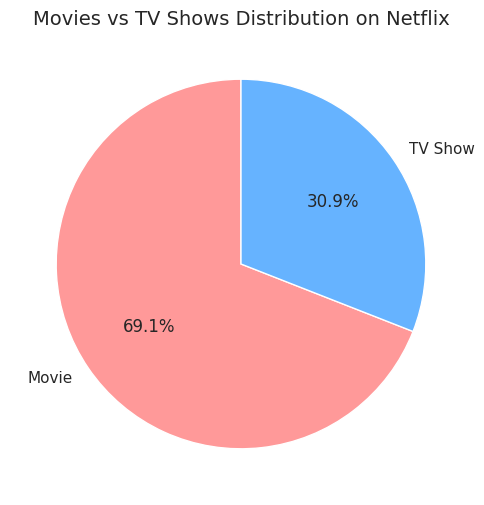

,count
Category,
Movie,5377
TV Show,2410


In [8]:
# Count of Movies vs TV Shows
type_counts = df['Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Movies vs TV Shows Distribution on Netflix", fontsize=14)
plt.show()

type_counts


7: Content Trend Over the Years

- Groups data by year and category (Movie/TV Show).  
- Shows how Netflix’s content mix evolved from 2008 to 2021.

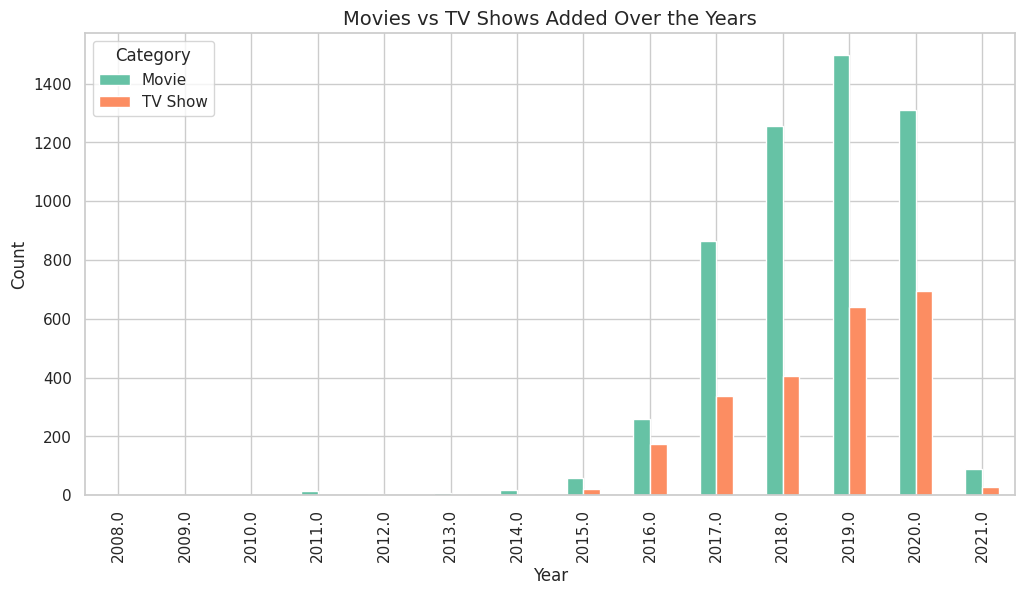

In [9]:
# Filter valid years
df_year = df.dropna(subset=['Year'])

# Group by year and content type
type_trend = df_year.groupby(['Year', 'Category']).size().unstack(fill_value=0)

# Plot the trend
type_trend.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Movies vs TV Shows Added Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


8: Top Countries Contributing Content

- Identifies which countries produce the most Netflix content.  
- Useful for analyzing global reach and diversity.

/tmp/ipython-input-2088175828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="mako")


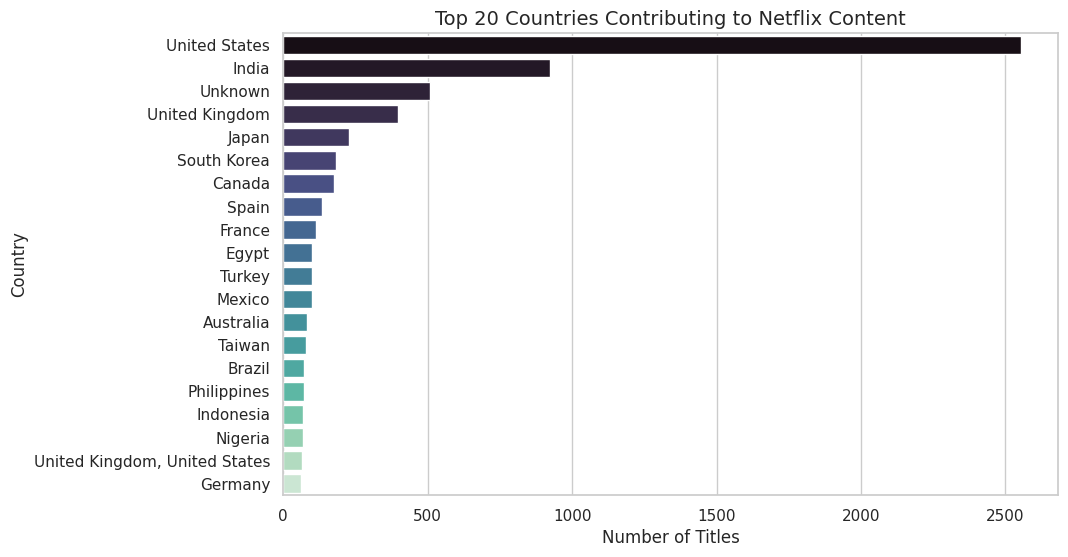

In [10]:
# Extract top 20 countries
country_counts = df['Country'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="mako")
plt.title("Top 20 Countries Contributing to Netflix Content", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


9: Genre Analysis

- Splits comma-separated genres into multiple rows for better counting.  
- Identifies the top 20 most frequent genres in the dataset.

/tmp/ipython-input-1101448436.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="cool")


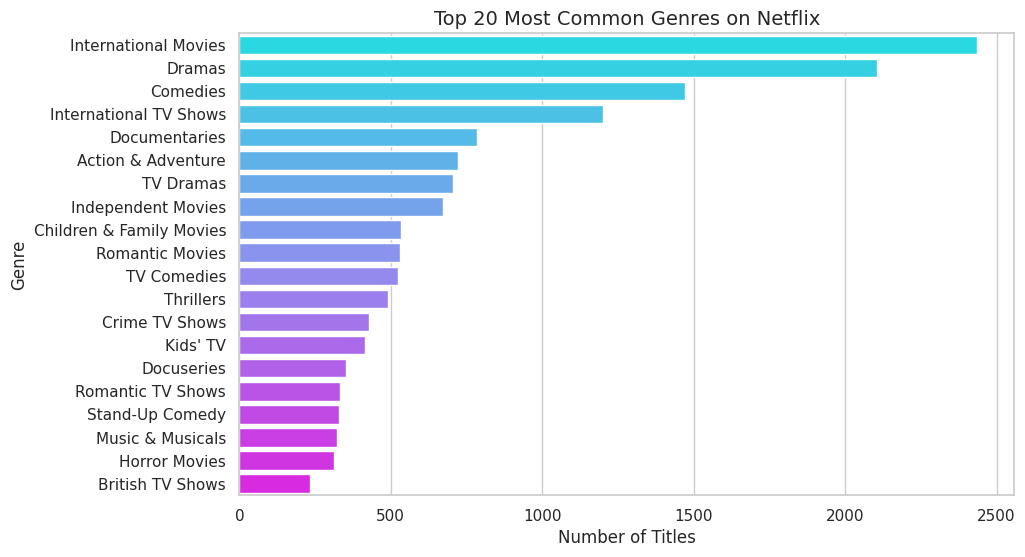

In [11]:
# Check column names to identify genre column
df.columns

# If your dataset has 'Type' or 'Listed In' or 'Genre' column, use that:
genre_col = 'Type'  # 👈 Change this to the actual genre column name if needed

# Split and explode genres
df_genres = df.assign(Genre=df[genre_col].str.split(',')).explode('Genre')
df_genres['Genre'] = df_genres['Genre'].str.strip()

# Count top 20 genres
top_genres = df_genres['Genre'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="cool")
plt.title("Top 20 Most Common Genres on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


10: Genre Popularity Over the Years



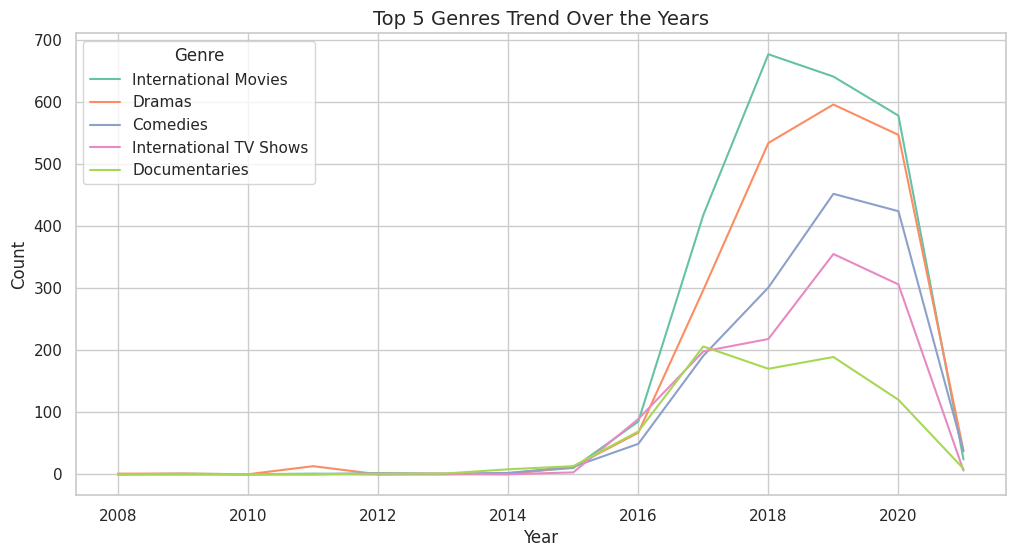

In [12]:
# Group by year and genre
genre_trend = df_genres.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Plot top 5 genres over time
top5_genres = top_genres.head(5).index
genre_trend[top5_genres].plot(figsize=(12,6))
plt.title("Top 5 Genres Trend Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

11: Save Processed Files

In [13]:
# Save summary CSVs to your Drive
df.to_csv('/content/drive/MyDrive/netflix_cleaned.csv', index=False)
type_trend.to_csv('/content/drive/MyDrive/movies_tv_trend.csv')
country_counts.to_csv('/content/drive/MyDrive/top_countries.csv')
top_genres.to_csv('/content/drive/MyDrive/top_genres.csv')

print("✅ All summary files saved to your Drive!")

✅ All summary files saved to your Drive!


12: Conclusion and Recommendations

# 🧾 Conclusions & Insights

1. **Movies dominate Netflix’s library**, but the share of TV Shows has increased in recent years.
2. **Top contributing countries**: USA, India, UK, Canada.
3. **Popular genres**: Drama, Comedy, Action, Documentaries.
4. **Content trend** shows Netflix expanded rapidly post-2016, likely due to increased global streaming.
5. **Recommendation**:
   - Increase investment in region-specific content.
   - Diversify underrepresented genres (e.g., Sci-Fi, Animation).
   - Strengthen partnerships with high-performing countries.

---

📌 **Next Steps**
- Perform sentiment analysis using `Description` column.
- Create dashboards using Power BI or Tableau.
- Deploy as a Streamlit web app for interactive exploration.
